In [6]:
import pandas as pd

# Load the CSV file into a DataFrame
csv_file = '../10-10-2024_combined_distances_vanilla_256_512.csv'
df = pd.read_csv(csv_file)

# Show the first few rows to confirm the data is loaded correctly
print(df.head())


                    pdb_file  shortest_ARG126-GLU52  shortest_ARG126-PHE59  \
0   model_2_ptm_r3_seed1.pdb                    5.0                   15.0   
1   model_3_ptm_r4_seed7.pdb                    4.4                   15.2   
2   model_4_ptm_r1_seed6.pdb                    5.0                   15.8   
3   model_5_ptm_r6_seed0.pdb                    3.5                   14.4   
4  model_5_ptm_r11_seed2.pdb                    3.5                   14.5   

   shortest_ARG126-GLU62  shortest_ARG129-GLU52  shortest_ARG129-PHE59  \
0                   19.2                    0.9                    9.3   
1                   19.4                    3.8                   10.0   
2                   20.5                    4.4                    9.5   
3                   18.8                    5.3                    8.9   
4                   18.9                    5.2                    9.4   

   shortest_ARG129-GLU62  shortest_ARG132-GLU52  shortest_ARG132-PHE59  \
0           

Error: Column 'CA_GLU102_CA-GLU1353_CA' not found in the DataFrame.


<Figure size 1200x600 with 0 Axes>

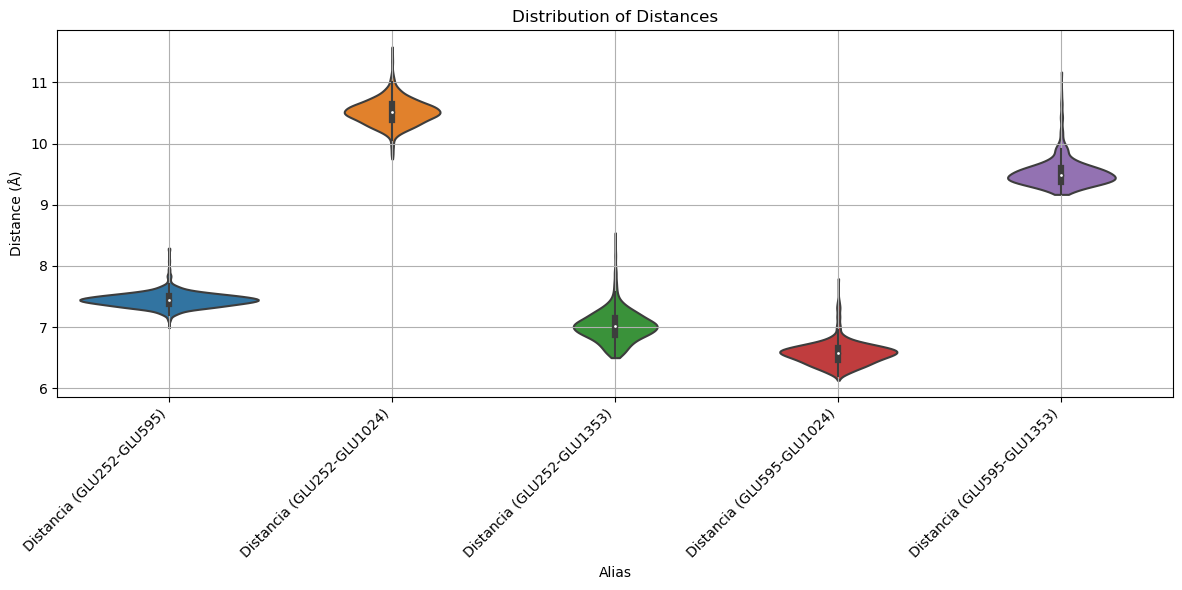

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distances_by_alias_violin(df, alias_dict, title_custom_add='' ):
    """
    Plots the distribution of distances by alias based on the specified columns in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame containing distance data.
    alias_dict (dict): A dictionary where keys are aliases, and values are the corresponding column names for distances.

    Returns:
    None: Displays the violin plot.
    """
    plt.figure(figsize=(12, 6))
    
    # Prepare the data for plotting
    plot_data = []
    labels = []

    # Loop through the dictionary
    for alias, column_name in alias_dict.items():
        # Check if the column exists in the DataFrame
        if column_name not in df.columns:
            print(f"Error: Column '{column_name}' not found in the DataFrame.")
            continue
        
        # Extract the distances, dropping NaN values
        distances = df[column_name].dropna()

        # Add the distances and the alias to the plot data
        plot_data.extend(distances)
        labels.extend([alias] * len(distances))  # Repeat the alias label for each distance value

    # Create a new DataFrame for the plotting data
    plot_df = pd.DataFrame({
        'Alias': labels,
        'Distance': plot_data
    })

    # Plot a violin plot for the distances by alias
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='Alias', y='Distance', data=plot_df, inner='box', cut=0)
    plt.title('Distribution of Distances'+title_custom_add)
    plt.xlabel('Alias')
    plt.ylabel('Distance (Å)')
    plt.grid(True)
    
    # Move the legend outside the plot (if needed)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

# Example usage
alias_dict = {
    'Distancia (GLU252-GLU595)': 'CA_GLU252_CA-GLU595_CA',
    'Distancia (GLU252-GLU1024)': 'CA_GLU252_CA-GLU1024_CA',
    'Distancia (GLU252-GLU1353)': 'CA_GLU252_CA-GLU1353_CA',
    'Distancia (GLU595-GLU1024)': 'CA_GLU595_CA-GLU1024_CA',
    'Distancia (GLU595-GLU1353)': 'CA_GLU595_CA-GLU1353_CA',
    'Distancia (GLU1024-GLU1353)': 'CA_GLU102_CA-GLU1353_CA',
}

# Assuming df is already loaded with your CSV file
plot_distances_by_alias_violin(df, alias_dict)


<Figure size 1200x600 with 0 Axes>

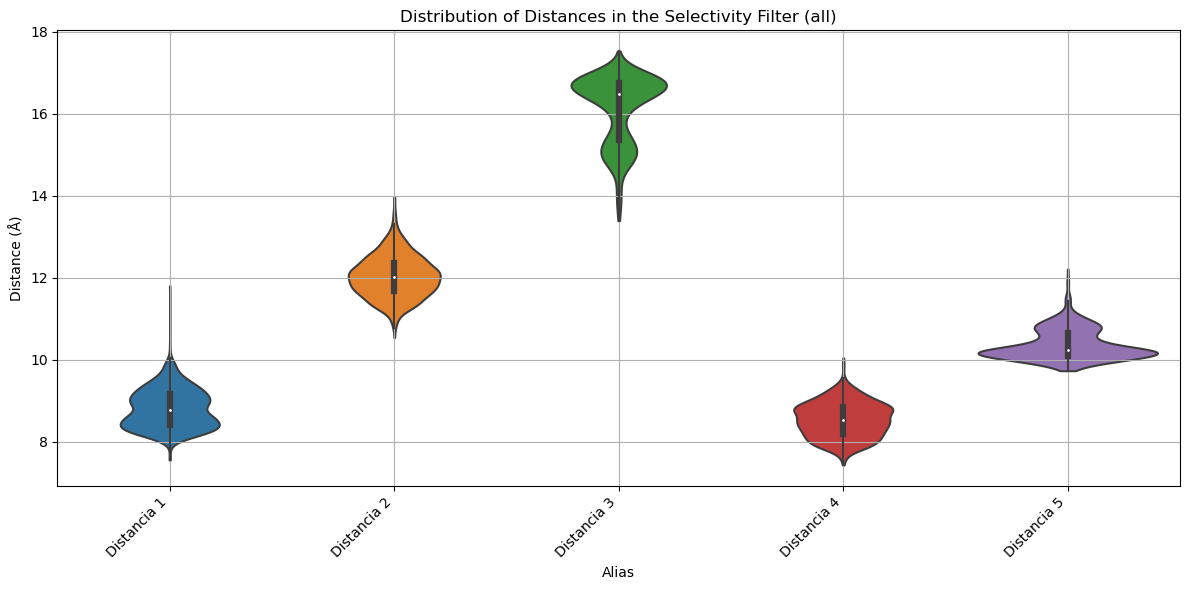

In [8]:
intracellularGate_dict={
    'Distancia ': 'CA_LEU290_CA-LEU638_CA',
    'Distancia L290-V1071': 'CA_LEU290_CA-VAL1071_CA',
    'Distancia L290-I1401': 'CA_LEU290_CA-ILE1401_CA',
    'Distancia 4': 'CA_LEU638_CA-VAL1071_CA',
    'Distancia 5': 'CA_VAL1071_CA-ILE1401_CA'
}
plot_distances_by_alias_violin(df, intracellularGate_dict)